<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/tsa_ma_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

!pip -q install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 11.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd


In [3]:
IBEX = yf.Ticker("^IBEX")

IBEX_values = IBEX.history(start="2020-06-01")

In [4]:
IBEX_values

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01,7228.700195,7276.000000,7160.100098,7221.399902,291929600,0,0
2020-06-02,7264.000000,7445.299805,7236.899902,7408.100098,402947100,0,0
2020-06-03,7487.299805,7629.700195,7448.899902,7626.399902,445036400,0,0
2020-06-04,7567.700195,7669.200195,7516.000000,7566.799805,514858000,0,0
2020-06-05,7672.000000,7890.399902,7664.100098,7872.600098,573283900,0,0
...,...,...,...,...,...,...,...
2022-05-31,8898.799805,8922.799805,8836.900391,8851.500000,314821900,0,0
2022-06-01,8881.299805,8909.299805,8736.700195,8747.200195,163198400,0,0
2022-06-02,8778.900391,8793.200195,8709.000000,8744.099609,103691200,0,0


In [5]:
import matplotlib.pyplot as plt


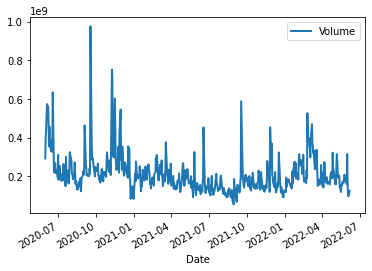

In [6]:
IBEX_values[['Volume']].plot(lw=2);

In [7]:
from statsmodels.tsa.stattools import adfuller
series = IBEX_values[["Volume"]].squeeze()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -5.842253
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [8]:
result[1]

3.7536010741938026e-07

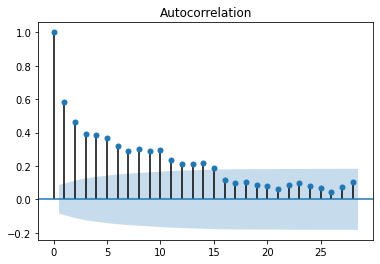

In [9]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(series)
plt.show()

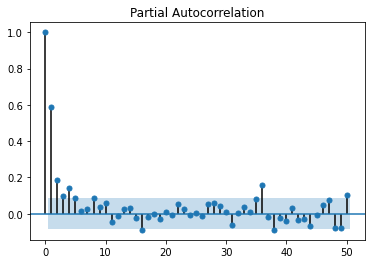

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

In [11]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
series
from statsmodels.tsa.arima_model import ARIMA
ARMA_model = ARIMA(endog=series, order=(0, 0, 15))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  518
Model:                    ARMA(0, 15)   Log Likelihood              -10125.331
Method:                       css-mle   S.D. of innovations       74565796.791
Date:                Tue, 07 Jun 2022   AIC                          20284.662
Time:                        06:30:02   BIC                          20356.911
Sample:                             0   HQIC                         20312.969
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.11e+08   1.17e+07     17.965      0.000    1.88e+08    2.34e+08
ma.L1.Volume      0.4145      0.044      9.459      0.000       0.329       0.500
ma.L2.Volume      0.2834      0.048     

In [14]:
pred=[]
pred = results.predict(0,517)


In [15]:
pred

Date
2020-06-01    2.110171e+08
2020-06-02    2.553186e+08
2020-06-03    3.120858e+08
2020-06-04    3.462858e+08
2020-06-05    3.840003e+08
                  ...     
2022-05-31    1.827737e+08
2022-06-01    2.419733e+08
2022-06-02    1.933406e+08
2022-06-03    1.548079e+08
2022-06-06    1.615618e+08
Length: 518, dtype: float64

In [16]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-05-31    314821900
2022-06-01    163198400
2022-06-02    103691200
2022-06-03     95868700
2022-06-06    124143400
Name: Volume, Length: 518, dtype: int64

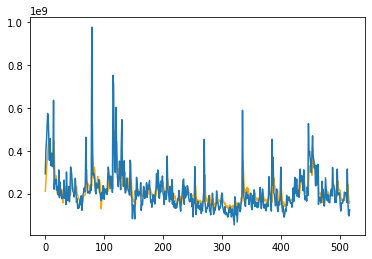

In [17]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [18]:
ARMA_model = ARIMA(endog=series[:500], order=(0, 0, 20))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  500
Model:                    ARMA(0, 20)   Log Likelihood               -9775.310
Method:                       css-mle   S.D. of innovations       74819755.681
Date:                Tue, 07 Jun 2022   AIC                          19594.620
Time:                        06:33:53   BIC                          19687.342
Sample:                             0   HQIC                         19631.004
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.125e+08   1.43e+07     14.913      0.000    1.85e+08     2.4e+08
ma.L1.Volume      0.4084      0.045      9.116      0.000       0.321       0.496
ma.L2.Volume      0.2754      0.049     

In [ ]:
series

Date
2022-05-12    202060000
2022-05-13    148599600
2022-05-16    118777700
2022-05-17    156305200
2022-05-18    156404000
2022-05-19    155481600
2022-05-20    172383300
2022-05-23    166876400
2022-05-24    207033000
2022-05-25    203488200
2022-05-26    203819800
2022-05-27    194951400
2022-05-30    159281100
2022-05-31    314821900
2022-06-01    163198400
2022-06-02    103691200
2022-06-03     95868700
Name: Volume, dtype: int64

In [ ]:
pred = results.predict(0,517)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


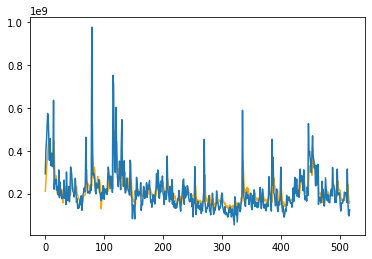

In [19]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [20]:

from sklearn.metrics import mean_squared_error
  


MSE = np.square(np.subtract(series[:500],pred[:500])).mean()


In [24]:
data2=pd.read_csv("/content/airline-passengers.csv")


In [25]:
data2

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


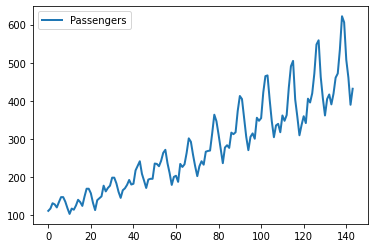

In [27]:
data2[['Passengers']].plot(lw=2);

In [29]:
series2 = data2[["Passengers"]].squeeze()
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


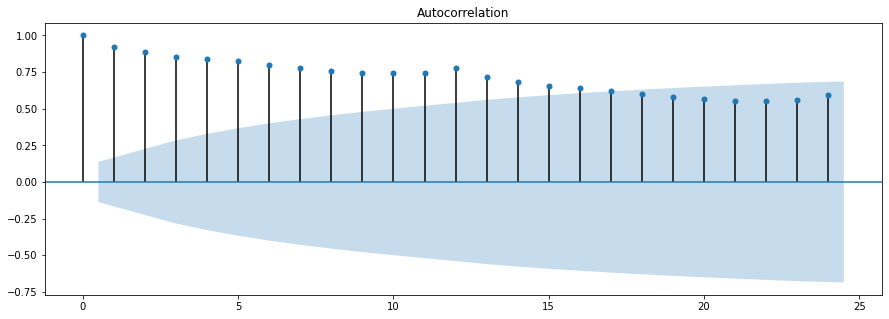

In [30]:
series2

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [31]:
diff=series2.diff(1).fillna(0)

In [32]:
diff

0       0.0
1       6.0
2      14.0
3      -3.0
4      -8.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: Passengers, Length: 144, dtype: float64

In [33]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.889186
p-value: 0.046620
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579


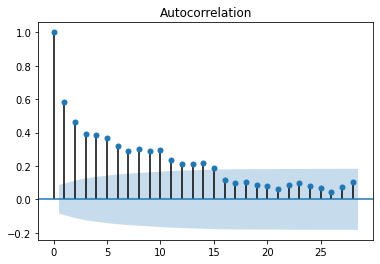

In [34]:
plot_acf(series)
plt.show()

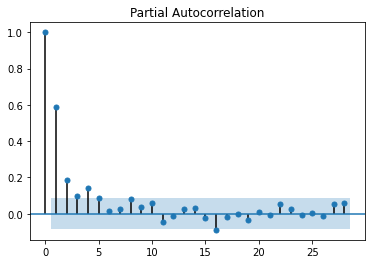

In [35]:
plot_pacf(series)
plt.show()

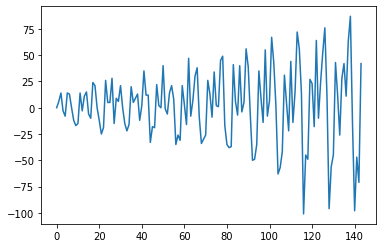

In [36]:
plt.plot(diff)
plt.show()

In [37]:
ARMA_model = ARIMA(endog=diff, order=(0, 0, 3))
results = ARMA_model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(0, 3)   Log Likelihood                -690.183
Method:                       css-mle   S.D. of innovations             28.729
Date:                Tue, 07 Jun 2022   AIC                           1390.366
Time:                        06:42:23   BIC                           1405.216
Sample:                             0   HQIC                          1396.400
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6553      0.130     20.430      0.000       2.401       2.910
ma.L1.Passengers     0.0523      0.089      0.588      0.557      -0.122       0.227
ma.L2.Passengers    -0.7930 

In [38]:
pred = results.predict(0,203)

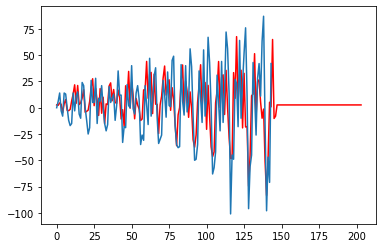

In [39]:

plt.plot(pred,color="red")
plt.plot(diff)
plt.show()